## General Formula of the Skewed Multi Step Indices

A random walk is a mathematical object, known as a stochastic or random process, that describes a path consisting of a succession of random steps on some mathematical space. For our discrete-time random walk, the position at time $t$ is given by the following equation:

$$
x_t = x_0 + \sum_{i=1}^{t} s_i
$$

where:
- $x_t$ is the position at time $t$,
- $x_0$ is the initial position,
- $s_i$ represents the step taken at time $i$, which is randomly selected from a set of possible step sizes, each associated with a specific probability.

The steps $s_i$ are independently distributed, drawn from a predefined set of step sizes with associated probabilities. This setup results in a model where the movement direction and magnitude at each step are stochastic.

## Proposal of Parameters

The parameters for the random walk are defined in terms of the step sizes and their associated probabilities. Below are the parameters for each proposal:


#### MT5 | SkewStepRNG +

| **Step size** | -1   | 0.1  | 0.2  | 0.3  | 0.4  |
|---------------|------|------|------|------|------|
| **Probabilities** | 10.00% | 83.00% | 5.00% | 1.00% | 1.00% |
| **Cumulative Sum** | 10.00% | 93.00% | 98.00% | 99.00% | 100.00% |

#### MT5 | SkewStepRNG -

| **Step size** | -0.4 | -0.3 | -0.2 | -0.1 | 1    |
|---------------|------|------|------|------|------|
| **Probabilities** | 1.00% | 1.00% | 5.00% | 83.00% | 10.00% |
| **Cumulative Sum** | 1.00% | 2.00% | 7.00% | 90.00% | 100.00% |

#### cTrader | SkewStepRNG +

| **Step size** | -0.5 | 0.1  | 0.2  | 0.3  |
|---------------|------|------|------|------|
| **Probabilities** | 20.00% | 65.00% | 10.00% | 5.00% |
| **Cumulative Sum** | 20.00% | 85.00% | 95.00% | 100.00% |

#### cTrader | SkewStepRNG -

| **Step size** | -0.3 | -0.2 | -0.1 | 0.5  |
|---------------|------|------|------|------|
| **Probabilities** | 5.00% | 10.00% | 65.00% | 20.00% |
| **Cumulative Sum** | 5.00% | 15.00% | 80.00% | 100.00% |



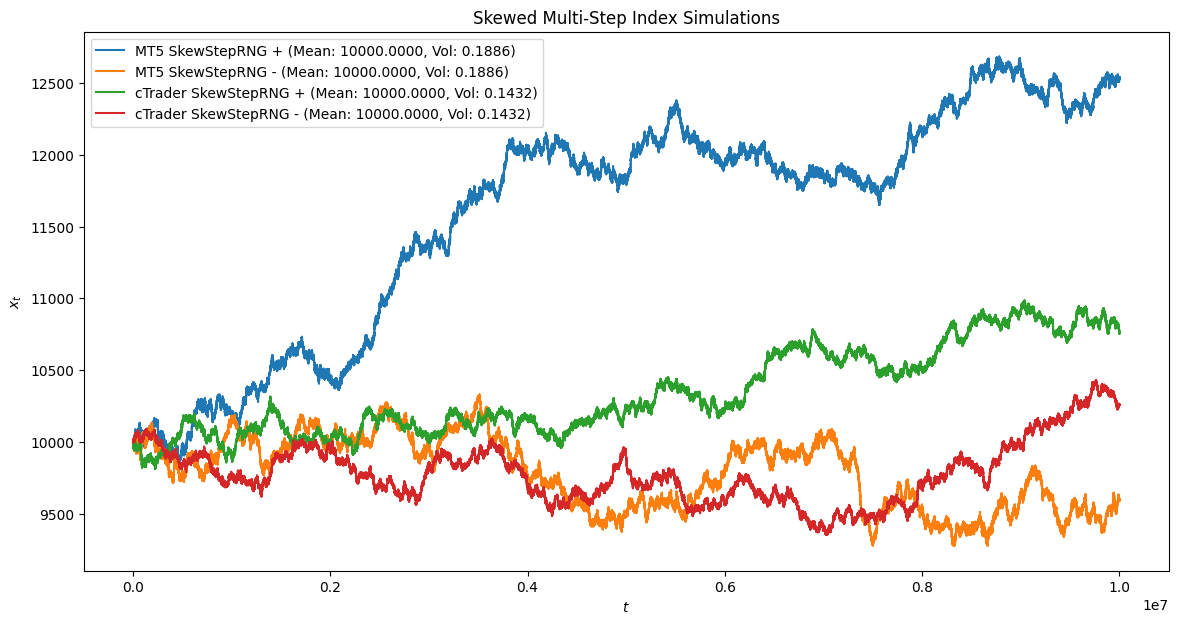

In [32]:
import numpy as np
import matplotlib.pyplot as plt

n = 10_000_000
x0 = 10_000
seconds_per_year = 86400 * 365

# Function to calculate mean and volatility
def calculate_metrics(step_sizes, probabilities):
    mean_step = np.dot(step_sizes, probabilities)
    EX2 = np.dot(step_sizes**2, probabilities)  # E(X^2)
    variance_step = EX2 - mean_step**2  # E(X^2) - [E(X)]^2
    mean_annual = x0 + seconds_per_year * mean_step
    vol_annual = np.sqrt(variance_step/10000**2 * seconds_per_year)
    return mean_annual, vol_annual

# MT5 | SkewStepRNG +
step_sizes_plus_mt5 = np.array([-1, 0.1, 0.2, 0.3, 0.4])
probabilities_plus_mt5 = np.array([0.1, 0.83, 0.05, 0.01, 0.01])
steps_plus_mt5 = np.random.choice(step_sizes_plus_mt5, size=n, p=probabilities_plus_mt5)
x_plus_mt5 = x0 + np.cumsum(steps_plus_mt5)
mean_plus_mt5, vol_plus_mt5 = calculate_metrics(step_sizes_plus_mt5, probabilities_plus_mt5)

# MT5 | SkewStepRNG -
step_sizes_minus_mt5 = np.array([-0.4, -0.3, -0.2, -0.1, 1])
probabilities_minus_mt5 = np.array([0.01, 0.01, 0.05, 0.83, 0.1])
steps_minus_mt5 = np.random.choice(step_sizes_minus_mt5, size=n, p=probabilities_minus_mt5)
x_minus_mt5 = x0 + np.cumsum(steps_minus_mt5)
mean_minus_mt5, vol_minus_mt5 = calculate_metrics(step_sizes_minus_mt5, probabilities_minus_mt5)

# cTrader | SkewStepRNG +
step_sizes_plus_ctrader = np.array([-0.5, 0.1, 0.2, 0.3])
probabilities_plus_ctrader = np.array([0.2, 0.65, 0.1, 0.05])
steps_plus_ctrader = np.random.choice(step_sizes_plus_ctrader, size=n, p=probabilities_plus_ctrader)
x_plus_ctrader = x0 + np.cumsum(steps_plus_ctrader)
mean_plus_ctrader, vol_plus_ctrader = calculate_metrics(step_sizes_plus_ctrader, probabilities_plus_ctrader)

# cTrader | SkewStepRNG -
step_sizes_minus_ctrader = np.array([-0.3, -0.2, -0.1, 0.5])
probabilities_minus_ctrader = np.array([0.05, 0.1, 0.65, 0.2])
steps_minus_ctrader = np.random.choice(step_sizes_minus_ctrader, size=n, p=probabilities_minus_ctrader)
x_minus_ctrader = x0 + np.cumsum(steps_minus_ctrader)
mean_minus_ctrader, vol_minus_ctrader = calculate_metrics(step_sizes_minus_ctrader, probabilities_minus_ctrader)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x_plus_mt5, label=f'MT5 SkewStepRNG + (Mean: {mean_plus_mt5:.4f}, Vol: {vol_plus_mt5:.4f})')
plt.plot(x_minus_mt5, label=f'MT5 SkewStepRNG - (Mean: {mean_minus_mt5:.4f}, Vol: {vol_minus_mt5:.4f})')
plt.plot(x_plus_ctrader, label=f'cTrader SkewStepRNG + (Mean: {mean_plus_ctrader:.4f}, Vol: {vol_plus_ctrader:.4f})')
plt.plot(x_minus_ctrader, label=f'cTrader SkewStepRNG - (Mean: {mean_minus_ctrader:.4f}, Vol: {vol_minus_ctrader:.4f})')
plt.xlabel("$t$")
plt.ylabel("$x_t$")
plt.title("Skewed Multi-Step Index Simulations")
plt.legend()
plt.show()

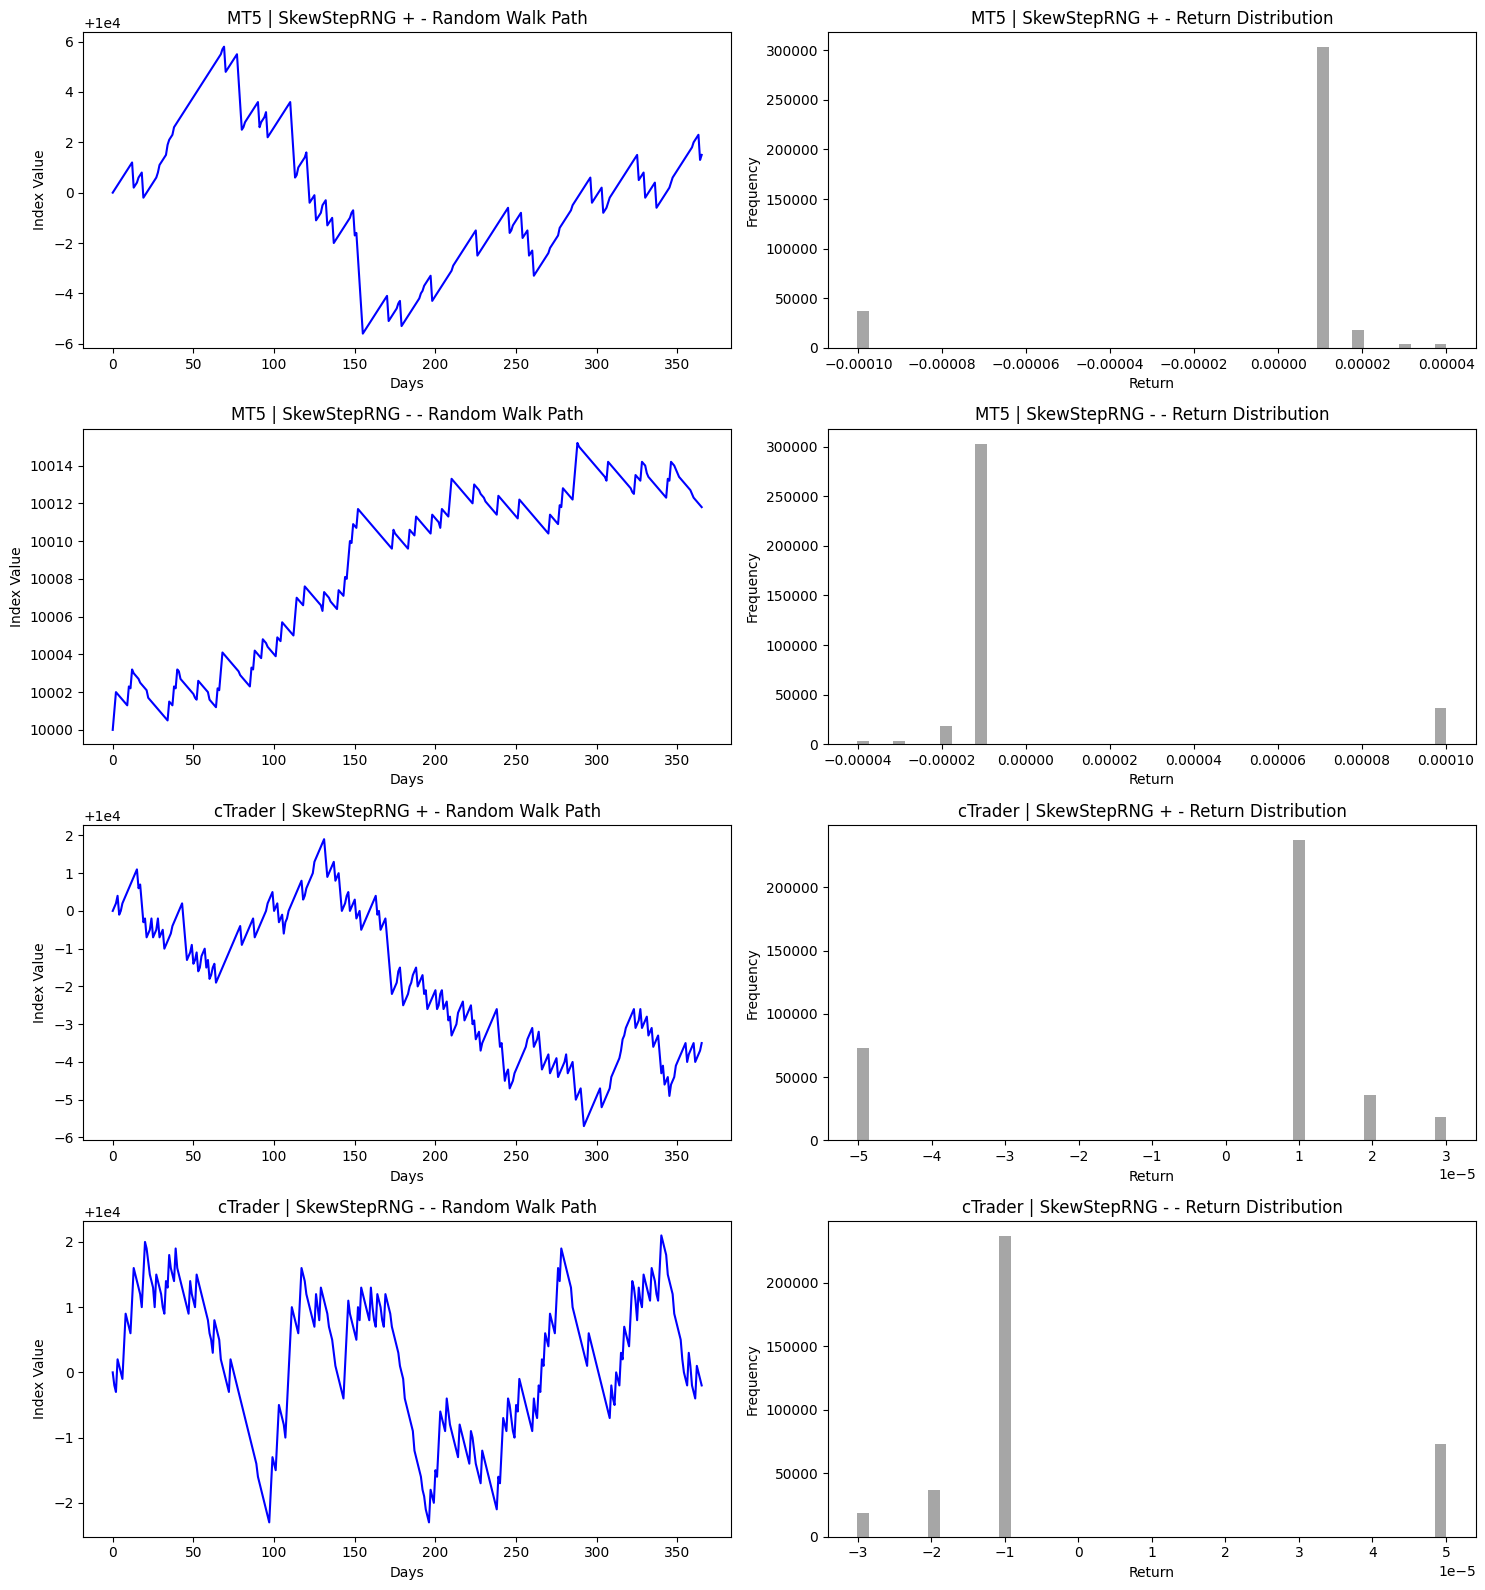

,Proposal,Mean Return,Variance Return,Annualized Volatility,Skewness Return,Kurtosis Return
0,MT5 | SkewStepRNG +,-8.214447e-08,1.134913e-09,0.189184,-2.571223,4.833244
1,MT5 | SkewStepRNG -,4.924435e-09,1.127540e-09,0.188569,2.584054,4.901915
2,cTrader | SkewStepRNG +,6.830489e-09,6.490573e-10,0.143069,-1.341774,0.113744
3,cTrader | SkewStepRNG -,-1.731164e-09,6.512012e-10,0.143305,1.337083,0.101386


In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1)

# Initialize parameters
x0 = 10_000
n_days = 365  # Number of days in a year to simulate
simulations = 1000  # Number of random walk simulations

# Define step sizes and probabilities for each proposal
proposals = {
    "MT5 | SkewStepRNG +": (np.array([-1, 0.1, 0.2, 0.3, 0.4]), np.array([0.1, 0.83, 0.05, 0.01, 0.01])),
    "MT5 | SkewStepRNG -": (np.array([-0.4, -0.3, -0.2, -0.1, 1]), np.array([0.01, 0.01, 0.05, 0.83, 0.1])),
    "cTrader | SkewStepRNG +": (np.array([-0.5, 0.1, 0.2, 0.3]), np.array([0.2, 0.65, 0.1, 0.05])),
    "cTrader | SkewStepRNG -": (np.array([-0.3, -0.2, -0.1, 0.5]), np.array([0.05, 0.1, 0.65, 0.2]))
}

# Initialize DataFrame to store results
results = []

# Set up plot
fig, axes = plt.subplots(nrows=len(proposals), ncols=2, figsize=(15, 4 * len(proposals)))

# Simulate and plot each proposal
for idx, (name, (step_sizes, probabilities)) in enumerate(proposals.items()):
    paths = np.zeros((simulations, n_days + 1))
    paths[:, 0] = x0
    for i in range(1, n_days + 1):
        steps = np.random.choice(step_sizes, size=simulations, p=probabilities)
        paths[:, i] = paths[:, i - 1] + steps
    
    # Calculate daily returns
    returns = (paths[:, 1:] - paths[:, :-1]) / paths[:, :-1]
    
    # Compute moments for each simulation
    mean_return = np.mean(returns)
    variance_return = np.var(returns)
    annualized_volatility = np.sqrt(variance_return * n_days * 86400)  # Annualizing the volatility
    skewness_return = stats.skew(returns.flatten())
    kurtosis_return = stats.kurtosis(returns.flatten())
    
    # Store results
    results.append({
        "Proposal": name,
        "Mean Return": mean_return,
        "Variance Return": variance_return,
        "Annualized Volatility": annualized_volatility,
        "Skewness Return": skewness_return,
        "Kurtosis Return": kurtosis_return
    })

    # Plot random walk path
    axes[idx, 0].plot(paths[0], color='blue')
    axes[idx, 0].set_title(f'{name} - Random Walk Path')
    axes[idx, 0].set_xlabel('Days')
    axes[idx, 0].set_ylabel('Index Value')

    # Plot return distribution
    axes[idx, 1].hist(returns.flatten(), bins=50, color='gray', alpha=0.7)
    axes[idx, 1].set_title(f'{name} - Return Distribution')
    axes[idx, 1].set_xlabel('Return')
    axes[idx, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Convert results to DataFrame and display
df_results = pd.DataFrame(results)
display(df_results)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Simulation parameters
np.random.seed(1)  # For reproducibility
n = 100  # Number of steps in each simulation
simulations = 100  # Number of simulations to run for visualization
x0 = 10_000  # Starting value of the random walk
seconds_per_year = 86400 * 365

# Define step sizes and probabilities for the skewed proposals
proposals = {
    "MT5 | SkewStepRNG +": (np.array([-1, 0.1, 0.2, 0.3, 0.4]), np.array([0.1, 0.83, 0.05, 0.01, 0.01])),
    "MT5 | SkewStepRNG -": (np.array([-0.4, -0.3, -0.2, -0.1, 1]), np.array([0.01, 0.01, 0.05, 0.83, 0.1])),
    "cTrader | SkewStepRNG +": (np.array([-0.5, 0.1, 0.2, 0.3]), np.array([0.2, 0.65, 0.1, 0.05])),
    "cTrader | SkewStepRNG -": (np.array([-0.3, -0.2, -0.1, 0.5]), np.array([0.05, 0.1, 0.65, 0.2]))
}

# Prepare figure for plotting
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 24))

# Data storage for moments
moment_data = []

# Iterate over each proposal to plot simulations and their distributions
for idx, (name, (step_sizes, probabilities)) in enumerate(proposals.items()):
    # Generate multiple paths
    steps = np.random.choice(step_sizes, size=(simulations, n), p=probabilities)
    paths = x0 + np.cumsum(steps, axis=1)
    simple_returns = np.divide(paths[:, 1:], paths[:, :-1]) - 1
    volatility = np.std(simple_returns)

    # Plot paths
    ax1 = axes[idx, 0]
    for path in paths:
        ax1.plot(path, alpha=0.8)  # Reduced alpha to see overlapping paths
    ax1.set_title(f'{name} - Monte Carlo Simulation Paths')
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Position')

    # Plot distribution of final positions
    ax2 = axes[idx, 1]
    final_positions = paths[:, -1]
    ax2.hist(final_positions, bins=50, alpha=0.75, density=True, orientation='horizontal')
    ax2.set_title(f'{name} - Distribution of Final Positions')
    ax2.set_xlabel('Density')
    ax2.set_ylabel('Final Position')

    # Calculate drift: average step size per step
    drift = np.sum(steps) / (simulations * n)  # Total net movement divided by total number of steps across all simulations
    variance = np.var(final_positions)
    skewness = stats.skew(final_positions)
    kurtosis = stats.kurtosis(final_positions)

    moment_data.append({
        'Proposal': name,
        'Drift': drift,
        'Variance': variance,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Volatility of Return': volatility * 100 * np.sqrt(seconds_per_year)
    })

# Adjust layout
plt.tight_layout()
plt.show()

# Create and display DataFrame of moments
df_moments = pd.DataFrame(moment_data)
display(df_moments)

## Analysis of Skew Multi Step Index Probabilities Going Below Zero Over Multiple Years

This section presents the probabilities that the position $x_t$ will be less than zero after 1, 3, and 5 years. Each year consists of $86400 \times 365$ steps, corresponding to the number of seconds in a year, assuming continuous activity. The analysis utilizes the Central Limit Theorem (refer Appendix).

### Methodology

The random walk is defined by:
$x_t = x_0 + \sum_{i=1}^{t} s_i$
where:
- $x_0 = 10,000$ (initial position),
- $s_i$ represents the step taken at time $i$, drawn from a set of predefined step sizes each associated with specific probabilities.

The normal approximation for the position $x_t$ after $n$ steps is given by:
$x_t \sim \mathcal{N}(x_0 + n \mu, n \sigma^2)$
where:
- $\mu$ is the expected value of a single step,
- $\sigma^2$ is the variance of a single step.

### Calculations

For each proposal, we calculate:
- **Mean**: $\mu = E[s_i]$ = 0
- **Variance**: $\sigma^2 = E[s_i^2] - (E[s_i])^2 = E[s_i^2]$
- **Probability** $P(x_t < 0)$: Using the cumulative distribution function (CDF)

In [15]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Proposal parameters with skewed settings
proposals = {
    "MT5 | SkewStepRNG +": (np.array([-1, 0.1, 0.2, 0.3, 0.4]), np.array([0.1, 0.83, 0.05, 0.01, 0.01])),
    "MT5 | SkewStepRNG -": (np.array([-0.4, -0.3, -0.2, -0.1, 1]), np.array([0.01, 0.01, 0.05, 0.83, 0.1])),
    "cTrader | SkewStepRNG +": (np.array([-0.5, 0.1, 0.2, 0.3]), np.array([0.2, 0.65, 0.1, 0.05])),
    "cTrader | SkewStepRNG -": (np.array([-0.3, -0.2, -0.1, 0.5]), np.array([0.05, 0.1, 0.65, 0.2]))
}

x0 = 10000  # Initial position
years = [1, 3, 5]
steps_per_year = 86400 * 365  
results = []

for name, (step_sizes, probabilities) in proposals.items():
    mean_step = np.sum(step_sizes * probabilities)
    E_X_squared = np.sum(step_sizes**2 * probabilities)
    variance_step = E_X_squared - mean_step**2

    for year in years:
        n = steps_per_year * year
        # Normal approximation at n steps
        mean_n = n * mean_step + x0
        variance_n = n * variance_step
        std_n = np.sqrt(variance_n)

        # Calculate probability of x_t < 0
        probability_x_t_less_than_0 = stats.norm.cdf(0, loc=mean_n, scale=std_n)
        percentage_probability_x_t_less_than_0 = (probability_x_t_less_than_0 * 100).round(4)  # Convert to percentage
        
        # Store results
        results.append({
            "Proposal": name,
            "Year": year,
            "Probability x_t < 0 (%)": percentage_probability_x_t_less_than_0 
        })

# Convert results to DataFrame for display
df_results = pd.DataFrame(results)
display(df_results)

,Proposal,Year,Probability x_t < 0 (%)
0,MT5 | SkewStepRNG +,1,0.0000
1,MT5 | SkewStepRNG +,3,0.1103
2,MT5 | SkewStepRNG +,5,0.8867
3,MT5 | SkewStepRNG -,1,0.0000
4,MT5 | SkewStepRNG -,3,0.1103
5,MT5 | SkewStepRNG -,5,0.8867
6,cTrader | SkewStepRNG +,1,0.0000
7,cTrader | SkewStepRNG +,3,0.0028
8,cTrader | SkewStepRNG +,5,0.0893
9,cTrader | SkewStepRNG -,1,0.0000


## Application of Cantelli's Inequality to Multistep Indices

Cantelli's inequality, also known as the one-sided Chebyshev's inequality, is a tool in probability theory that provides an upper bound for the probability that a random variable deviates from its mean in a specified direction.

### Cantelli's Inequality (details on Appendix)

Cantelli's inequality states that for any real-valued random variable $X$ with mean $\mu$ and variance $\sigma^2$, and for any $k > 0$:

$$
P(X \leq \mu - k) \leq \frac{\sigma^2}{\sigma^2 + k^2}
$$


### Applying Cantelli's Inequality to Multistep

When analyzing random walks, particularly to determine the likelihood of the walk resulting in a negative final position, Cantelli's inequality provides a conservative estimate.

1. **Setup for Random Walks**: Consider a random walk where each step is represented by a random variable $X$ with mean $E[\text{step}]$ and variance $\text{Var}[\text{step}]$.

2. **Aggregate Properties**: After $n$ steps starting from $x_0$, the mean and variance of the position are:

   $$
   \mu = x_0 + n \cdot E[\text{step}], \quad \sigma^2 = n \cdot \text{Var}[\text{step}]
   $$

3. **Applying Cantelli's**: To find the upper bound for $P(X < 0)$, set $k = \mu$ in Cantelli's formula:

   $$
   P(X < 0) \leq \frac{\sigma^2}{\sigma^2 + \mu^2}
   $$

   This provides an upper bound on the probability that the final position of the random walk is less than zero, offering insights into the risk associated with different step distributions.



In [4]:
import numpy as np

# Initialize random seed and starting parameters
np.random.seed(1)
x0 = 10_000
n_years = [1, 3, 5]  # Years to check
seconds_per_year = 31_536_000

# Define step sizes and probabilities for skewed proposals
proposals = {
    "MT5 | SkewStepRNG +": (np.array([-1, 0.1, 0.2, 0.3, 0.4]), np.array([0.1, 0.83, 0.05, 0.01, 0.01])),
    "MT5 | SkewStepRNG -": (np.array([-0.4, -0.3, -0.2, -0.1, 1]), np.array([0.01, 0.01, 0.05, 0.83, 0.1])),
    "cTrader | SkewStepRNG +": (np.array([-0.5, 0.1, 0.2, 0.3]), np.array([0.2, 0.65, 0.1, 0.05])),
    "cTrader | SkewStepRNG -": (np.array([-0.3, -0.2, -0.1, 0.5]), np.array([0.05, 0.1, 0.65, 0.2]))
}

# Calculate and display the probability for each proposal and year
for name, (steps, probs) in proposals.items():
    mean_step = np.sum(steps * probs)
    variance_step = np.sum((steps - mean_step)**2 * probs)
    print(f"\n{name}:")
    for year in n_years:
        n_steps = seconds_per_year * year
        mu = x0 + n_steps * mean_step
        sigma2 = n_steps * variance_step
        # Probability estimation using Cantelli's inequality
        upper_bound_probability = sigma2 / (sigma2 + mu**2)
        print(f"  After {year} years: P(X < 0) <= {upper_bound_probability:.6f}")


MT5 | SkewStepRNG +:
  After 1 years: P(X < 0) <= 0.034351
  After 3 years: P(X < 0) <= 0.096427
  After 5 years: P(X < 0) <= 0.151005

MT5 | SkewStepRNG -:
  After 1 years: P(X < 0) <= 0.034351
  After 3 years: P(X < 0) <= 0.096427
  After 5 years: P(X < 0) <= 0.151005

cTrader | SkewStepRNG +:
  After 1 years: P(X < 0) <= 0.020087
  After 3 years: P(X < 0) <= 0.057933
  After 5 years: P(X < 0) <= 0.092964

cTrader | SkewStepRNG -:
  After 1 years: P(X < 0) <= 0.020087
  After 3 years: P(X < 0) <= 0.057933
  After 5 years: P(X < 0) <= 0.092964


# Appendix

## Central Limit Theorem Application to Skew Multistep Indices

The Central Limit Theorem (CLT) is a fundamental result in probability theory that states the distribution of the sum of a large number of independent, identically distributed (i.i.d.) random variables approaches a normal distribution, regardless of the original distribution of these variables. This principle can be applied to random walks (multistep indices), where each step is an independent random variable with a defined probability distribution.

### Conditions for CLT

The CLT applies under specific conditions:
1. **Independence**: Each step $s_i$ in the random walk is independent of the others.
2. **Identically Distributed**: Each step is drawn from the same distribution throughout the process.
3. **Finite Mean and Variance**: The distribution of the steps has a finite mean $\mu$ and variance $\sigma^2$.

### Calculation of Mean and Variance

For a random variable $X$ representing the step size, the mean and variance are given by:
- Mean: $\mu = E[X] = \sum x_i \cdot p_i$,
- Variance: $\sigma^2 = E[(X - E[X])^2] = E[X^2] - (E[X])^2 = \sum x_i^2 \cdot p_i$.

### Normal Approximation Using CLT

Given the steps are i.i.d. with finite mean and variance, the CLT states that the normalized sum:
$$
Z_n = \frac{\sum_{i=1}^n s_i - nE[X]}{\sqrt{n}\sigma}
$$
converges in distribution to a standard normal distribution as $n \rightarrow \infty$.

### Application to Multistep Indices

For a random walk starting at position $x_0$, the position after $n$ steps is:
$$
x_t = x_0 + \sum_{i=1}^n s_i,
$$
which, by the CLT, approximates to:
$$
\frac{x_t - x_0 - nE[X]}{\sqrt{n}\sigma} \sim N(0, 1)
$$
as $n \rightarrow \infty$. Thus, $x_t$ can be modeled by the normal distribution:
$$
x_t \sim N(x_0 + nE[X], n\sigma^2).
$$

### Probability of Negative Position

The probability that $x_t$ is less than zero can be calculated using the CDF of the normal distribution:
$$
P(x_t < 0) = \Phi\left(\frac{-x_0 - nE[X]}{\sqrt{n}\sigma}\right),
$$
where $\Phi$ is the CDF of the standard normal distribution.


## Cantelli's Inequality

Cantelli's inequality offers a rigorous method for estimating the probability that a real-valued random variable $X$ with finite variance $\sigma^2$ and expected value $\mu$ will deviate from its mean by at least a certain amount $\lambda$. This discussion delves into the optimization process to derive the best possible bound using this inequality.

### Preliminaries

Consider:
- $X$: A real-valued random variable.
- $\mu = \mathbb{E}[X]$: The mean of $X$.
- $\sigma^2 = \operatorname{Var}(X)$: The variance of $X$.
- $Y = X - \mathbb{E}[X]$: A transformation of $X$ such that $\mathbb{E}[Y] = 0$ and $\operatorname{Var}(Y) = \sigma^2$.

We aim to calculate the upper bound for the probability:
$$
\Pr(X - \mathbb{E}[X] \geq \lambda) = \Pr(Y \geq \lambda)
$$

### Application of Markov's Inequality

Markov's inequality states that for any non-negative random variable $Z$ and any $a > 0$:
$$
\Pr(Z \geq a) \leq \frac{\mathbb{E}[Z]}{a}
$$

When applied to $(Y+u)^2$ for $u \geq 0$, we obtain:
$$
\Pr((Y+u)^2 \geq (\lambda + u)^2) \leq \frac{\mathbb{E}[(Y+u)^2]}{(\lambda + u)^2}
$$

Given $\mathbb{E}[(Y+u)^2] = \sigma^2 + u^2$ (because $\mathbb{E}[Y] = 0$), this simplifies to:
$$
\Pr(Y \geq \lambda) \leq \frac{\sigma^2 + u^2}{(\lambda + u)^2}
$$

### Optimization of the Bound

The function to minimize is:

$$
f(u) = \frac{\sigma^2 + u^2}{(\lambda + u)^2}
$$

Differentiating $f(u)$ with respect to $u$ and setting the derivative equal to zero yields:
$$
f'(u) = \frac{2u(\lambda + u) - 2(\sigma^2 + u^2)}{(\lambda + u)^3} = 0
$$

Solving for $u$, we find:
$$
u(\lambda + u) = \sigma^2 + u^2
$$
$$
u \lambda = \sigma^2
$$
$$
u = \frac{\sigma^2}{\lambda}
$$

### Final Probability Bound

Plugging $u = \frac{\sigma^2}{\lambda}$ back into our expression gives:
$$
\Pr(Y \geq \lambda) \leq \frac{\sigma^2 + \left(\frac{\sigma^2}{\lambda}\right)^2}{\left(\lambda + \frac{\sigma^2}{\lambda}\right)^2} = \frac{\sigma^2}{\lambda^2 + \sigma^2}
$$



## Approximate Variance of the Return

To estimate the variance of returns in a financial model where the changes in value ($S$) are relatively small compared to the initial value ($X_0$), we can use a simplified formula. This approximation is particularly useful when the value of the financial instrument or index does not vary dramatically over the period being analyzed.

#### Mathematical Formulation

The variance of the return $R_t$ at time $t$ can be approximated by considering the step size $S$ relative to the previous value of the index $X_{t-1}$. Under the assumption that the changes $S$ are small compared to $X_0$, the previous value $X_{t-1}$ can be approximated by $X_0$:

$$ R_t = \frac{X_t - X_{t-1}}{X_{t-1}} \approx \frac{S_t}{X_0} $$

Where:
- $X_t$ is the value at time $t$.
- $X_{t-1}$ is the value at time $t-1$.
- $S_t$ is the step or change at time $t$.

Given this approximation, the variance of $R_t$ can be calculated as follows:

$$ \text{Var}(R_t) \approx \frac{\text{Var}(S)}{X_0^2} $$

#### Explanation

- $Var(S)$: Variance of the step sizes, which measures how much the steps deviate from their average value.
- $X_0^2$: Squaring the initial value adjusts the variance of the step sizes to the scale of returns.

This approximation assumes that the returns are primarily driven by the fluctuations in step sizes, and the impact of each step on the overall value diminishes as $X_0$ increases. It provides a quick way to estimate potential volatility without detailed simulation, suitable for initial analyses or when step sizes are indeed very small compared to the initial value.

### Proving with Logarithmic Returns 

#### **Mathematical Definition**

The logarithmic return $ R_t $ from time $ t-1 $ to time $ t $ for a price series $ X_t $ is defined as:

$$
R_t = \log\left(\frac{X_t}{X_{t-1}}\right)
$$

This formula calculates the natural logarithm of the ratio of consecutive prices, providing a measure of the relative change in value, expressed in a way that is time additive.

#### **Approximating Variance of Logarithmic Returns**

When approximating the variance of logarithmic returns, assuming the changes $ S $ (where $ S = X_t - X_{t-1} $) are small relative to $ X_0 $, the Taylor expansion of the logarithm around 1 can be utilized:

$$
\log\left(1 + \frac{S}{X_{t-1}}\right) \approx \frac{S}{X_{t-1}} - \frac{1}{2} \left(\frac{S}{X_{t-1}}\right)^2
$$

For small $ S $, the higher-order term (quadratic in $ S $) may be ignored, yielding:

$$
R_t \approx \frac{S}{X_{t-1}}
$$

Using this approximation and assuming $ X_{t-1} \approx X_0 $, the variance of $ R_t $ can be expressed as:

$$
\text{Var}(R_t) \approx \frac{\text{Var}(S)}{X_0^2}
$$

This approximation assumes that returns are primarily driven by the fluctuations in step sizes, and the effect of each step on the overall value diminishes as $ X_0 $ increases.
